# Import library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Dataset load

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

In [3]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

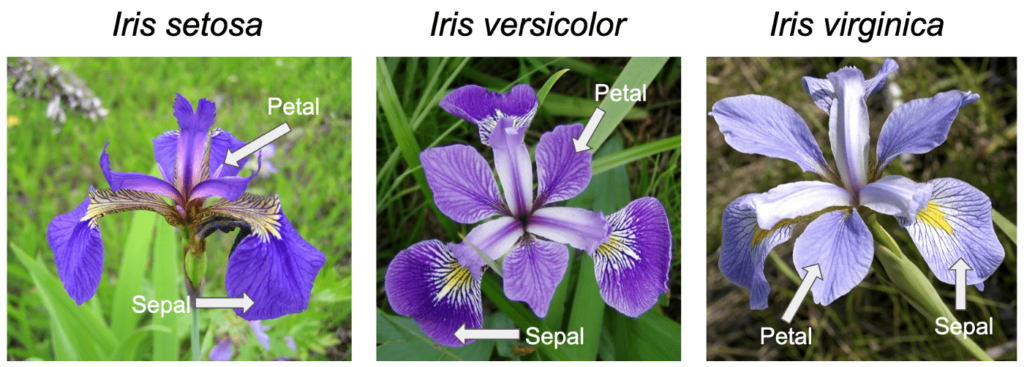

In [5]:
# Create DataFrame with features
df = pd.DataFrame(iris.data,columns=iris.feature_names)
# Add target columns
df['target'] = iris.target
# Add flower name columns
df['flower_name'] = df['target'].apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [6]:
df.shape

(150, 6)

In [7]:
# Setosa (target = 0): first 50 rows
setosa = df.iloc[0:50]

# Versicolor (target = 1): next 50 rows
versicolor = df.iloc[50:100]

# Virginica (target = 2): last 50 rows
virginica = df.iloc[100:150]

# Visualize Data

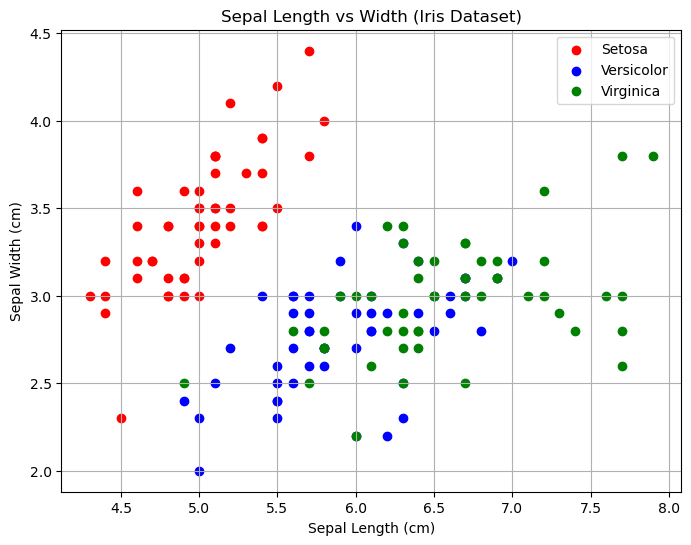

In [8]:
plt.figure(figsize=(8, 6))
plt.scatter(setosa['sepal length (cm)'], setosa['sepal width (cm)'], label='Setosa', color='red')
plt.scatter(versicolor['sepal length (cm)'], versicolor['sepal width (cm)'], label='Versicolor', color='blue')
plt.scatter(virginica['sepal length (cm)'], virginica['sepal width (cm)'], label='Virginica', color='green')

plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Sepal Length vs Width (Iris Dataset)')
plt.legend()
plt.grid(True)
plt.show()

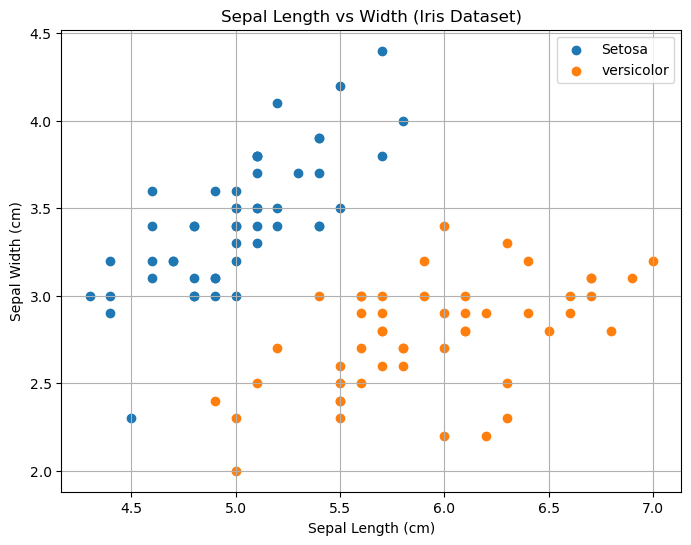

In [9]:
plt.figure(figsize=(8,6))
plt.scatter(setosa['sepal length (cm)'], setosa['sepal width (cm)'], label='Setosa')
plt.scatter(versicolor['sepal length (cm)'], versicolor['sepal width (cm)'], label='versicolor')

plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Sepal Length vs Width (Iris Dataset)')
plt.grid(True)
plt.legend()
plt.show()

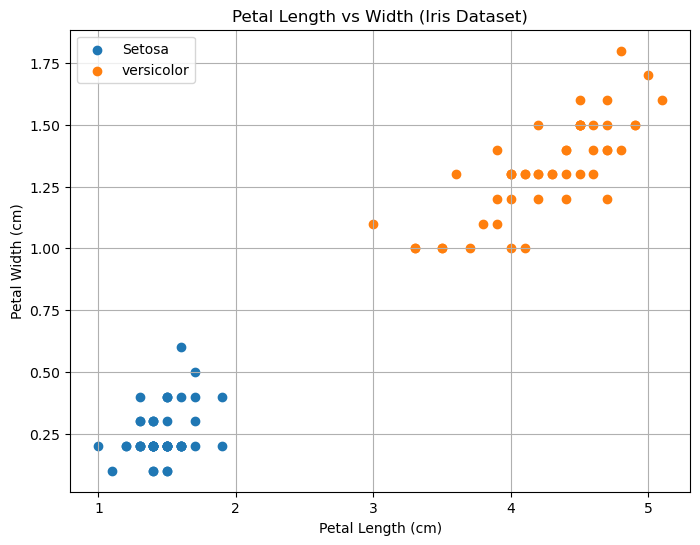

In [10]:
plt.figure(figsize=(8,6))
plt.scatter(setosa['petal length (cm)'], setosa['petal width (cm)'], label='Setosa')
plt.scatter(versicolor['petal length (cm)'], versicolor['petal width (cm)'], label='versicolor')

plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Petal Length vs Width (Iris Dataset)')
plt.grid(True)
plt.legend()
plt.show()

# Extract columns and Train test split

In [11]:
X = df.iloc[:,:4]
y = df.iloc[:,-2]

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   test_size=0.2,
                                                   random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [13]:
X_train

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
22,4.6,3.6,1.0,0.2
15,5.7,4.4,1.5,0.4
65,6.7,3.1,4.4,1.4
11,4.8,3.4,1.6,0.2
42,4.4,3.2,1.3,0.2
...,...,...,...,...
71,6.1,2.8,4.0,1.3
106,4.9,2.5,4.5,1.7
14,5.8,4.0,1.2,0.2
92,5.8,2.6,4.0,1.2


In [14]:
X_test

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
73,6.1,2.8,4.7,1.2
18,5.7,3.8,1.7,0.3
118,7.7,2.6,6.9,2.3
78,6.0,2.9,4.5,1.5
76,6.8,2.8,4.8,1.4
31,5.4,3.4,1.5,0.4
64,5.6,2.9,3.6,1.3
141,6.9,3.1,5.1,2.3
68,6.2,2.2,4.5,1.5
82,5.8,2.7,3.9,1.2


# Model train

In [15]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=10)
KNN.fit(X_train, y_train)

# predct
y_pred = KNN.predict(X_test)

In [16]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [17]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(KNN, X, y, cv=5)
print("Cross-validated scores:", scores)
print("Mean CV Accuracy:", scores.mean())


Cross-validated scores: [0.96666667 1.         1.         0.93333333 1.        ]
Mean CV Accuracy: 0.9800000000000001


# Confusion Matrix

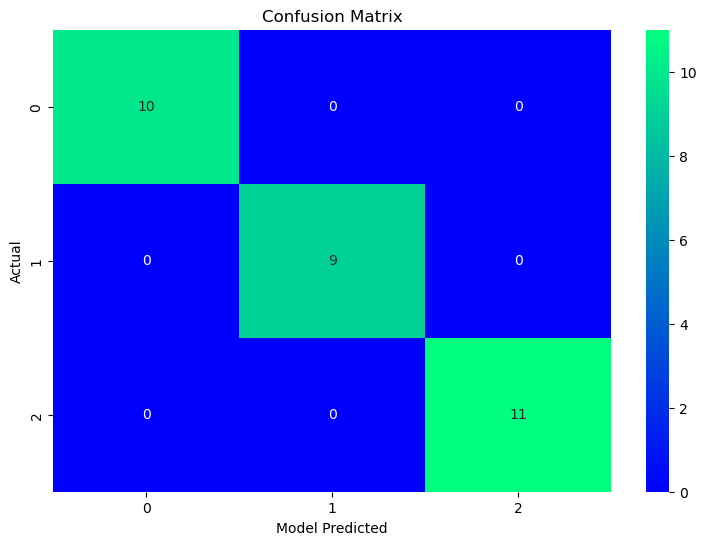

In [18]:
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(9,6))
sns.heatmap(CM, annot=True, fmt='d', cmap='winter')
plt.xlabel('Model Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Predict

In [19]:
# User input: [sepal length, sepal width, petal length, petal width]
user_input = [[4.8,3.0,1.5,0.3]] 

# Predict class index
prediction = KNN.predict(user_input)[0]

# Map prediction to flower name
flower_name = iris.target_names[prediction]

print(f"Prediction: The flower is {flower_name}")

Prediction: The flower is setosa


In [20]:
# Save